In [309]:
!pip install tweepy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [310]:
import tweepy
from tweepy import OAuthHandler

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

#### Account and API access setup

In [311]:
#Customer credentials
consumer_key = "YPKUrAQo5dvV0JQDrBZ2WyLsG"
consumer_secret = "1vEWMRo4OtWQbrsR3HwuTMJlZXRAAoK99srDDFVTdBILHf0i70"
access_token = "294560315-CPFiY2zTZLzQJ1lzfsAvmoniihfyRFkPLcx7axNU"
access_token_secret = "aqLVgAMlOJDGWIwxqDCVujalNLatKMW170NwCKwMnlnqh"

In [89]:
#Setup for API access
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Set up complete! Now you can get live tweets straight from Twitter!

### Twitter API reference

http://docs.tweepy.org/en/v3.5.0/api.html

In [90]:
#Get the tweets from my timeline
tweets = api.home_timeline()

In [91]:
type(tweets)

tweepy.models.ResultSet

In [92]:
print(tweets[0].text)
print(tweets[1].text)

Every country gives aid to other countries: @VivekSrivastav_, Political Analyst tells Navika Kumar on @thenewshour… https://t.co/962k6sjbPC
Yesterday I defended @INCIndia, but today I am confused that how PMNRF could be given to a private organisation:… https://t.co/tsS7uXP2Tm


In [93]:
for tweet in tweets[:5]:
    print(tweet.text)

Every country gives aid to other countries: @VivekSrivastav_, Political Analyst tells Navika Kumar on @thenewshour… https://t.co/962k6sjbPC
Yesterday I defended @INCIndia, but today I am confused that how PMNRF could be given to a private organisation:… https://t.co/tsS7uXP2Tm
Justice for Bennix &amp; Jeyaraj: Details on 'custodial death' of father-son duo in Tuticorin. 

Join Padmaja Joshi on… https://t.co/rc7QAtC8fU
.@RahulGandhi &amp; Sonia Gandhi is on bail and Robert Vadra is being interrogated by ED: @gauravbh, National Spokesper… https://t.co/AQxmkSGTIQ
We have lost our 20 brave soldiers in the 45 years during LAC standoff: @tehseenp, Political Analyst tells Navika K… https://t.co/VTEenQU3Y8


### Getting some tweets from a specified handle

In [94]:
tweets = api.user_timeline(screen_name='narendramodi',count=50)

In [95]:
type(tweets)

tweepy.models.ResultSet

#### Anatomy of a tweet

In [96]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x000001396CC86FD0>, _json={'created_at': 'Fri Jun 26 05:54:18 +0000 2020', 'id': 1276393328368480256, 'id_str': '1276393328368480256', 'text': 'A commendable step towards UP’s progress. https://t.co/AHhhRkBCai', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/AHhhRkBCai', 'expanded_url': 'https://www.pscp.tv/w/ccQzijMyMjExNTJ8MVlxR29ScWpNa3lLdo9ctaXGW7v9lh2KuPu6ksHivsv_YYRlsO0y8dSF_O9f', 'display_url': 'pscp.tv/w/ccQzijMyMjEx…', 'indices': [42, 65]}]}, 'source': '<a href="https://periscope.tv" rel="nofollow">Periscope</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime Minister of India', 'url': 'https://t.co/zzYhUUfq6i', 'e

In [97]:
tweets[0].text

'A commendable step towards UP’s progress. https://t.co/AHhhRkBCai'

In [98]:
tweets[0]._json

{'created_at': 'Fri Jun 26 05:54:18 +0000 2020',
 'id': 1276393328368480256,
 'id_str': '1276393328368480256',
 'text': 'A commendable step towards UP’s progress. https://t.co/AHhhRkBCai',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/AHhhRkBCai',
    'expanded_url': 'https://www.pscp.tv/w/ccQzijMyMjExNTJ8MVlxR29ScWpNa3lLdo9ctaXGW7v9lh2KuPu6ksHivsv_YYRlsO0y8dSF_O9f',
    'display_url': 'pscp.tv/w/ccQzijMyMjEx…',
    'indices': [42, 65]}]},
 'source': '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India',
  'description': 'Prime Minister of India',
  'url': 'https://t.co/zzYhUUfq6i',
  'entities': {'url': {'u

#### For now, we're interested in the 'text' alone

In [99]:
for tweet in tweets[:10]:
    print(tweet.text)

A commendable step towards UP’s progress. https://t.co/AHhhRkBCai
थोड़ी देर में मैं ‘आत्मनिर्भर उत्तर प्रदेश रोजगार अभियान’ की शुरुआत करूंगा। इसके तहत प्रवासी कामगारों को रोजगार के… https://t.co/teP4LJ49nJ
Birthday greetings to my Ministerial colleague, Shri @dpradhanbjp Ji. He has been making effective contributions in… https://t.co/Xl9xCzjeBg
बिहार और उत्तर प्रदेश के कुछ जिलों में भारी बारिश और आकाशीय बिजली गिरने से कई लोगों के निधन का दुखद समाचार मिला। रा… https://t.co/nNerZS05vl
आज से ठीक 45 वर्ष पहले देश पर आपातकाल थोपा गया था। उस समय भारत के लोकतंत्र की रक्षा के लिए जिन लोगों ने संघर्ष किया… https://t.co/hIc2w1wMz9
Great news for Uttar Pradesh, tourism and those inspired by the noble thoughts of Lord Buddha!

Kushinagar Airport… https://t.co/aoLae7bD9m
Setting up of the Animal Husbandry Infrastructure Development Fund augurs well for the sector. It will boost the in… https://t.co/v3ACADZmw0
Committed to a vibrant MSME Sector!

The Cabinet approved an interest subvention scheme fo

### Getting tweets for a specified query

#### Search function 

http://docs.tweepy.org/en/v3.5.0/api.html

In [106]:
tweets = api.search("coronavirus", count=50)

In [107]:
len(tweets)

50

In [108]:
#To Access tweets accross multiple pages use the Cursor method
fetched_tweets = tweepy.Cursor(api.search, q="coronavirus").items(500)

In [109]:
tweets_raw = []

for twt in fetched_tweets:
    tweets_raw.append(twt.text)

In [110]:
len(tweets_raw)

500

In [111]:
tweets_raw[:5]

['RT @TiffanyForAlief: DISTRICT F has some of the highest cases of COVID-19 per the latest update.  This. Is. Not. A. Game. \n\n77036, 77072 (m…',
 'RT @SportsCenter: Of the 302 NBA players to take tests on Tuesday, 16 have tested positive for the coronavirus, the NBA and NBPA announced…',
 'DIRECTO | Las cuatro comarcas aragonesas en fase dos suman 270 casos confirmados de covid-19 https://t.co/jW3WJLKzla',
 'ORLANDO, Fla. – With coronavirus numbers climbing and cases trending younger, Florida officials made the decision t… https://t.co/aRELRqXkGC',
 'How Coronavirus and Protests Broke Artificial Intelligence And Why It’s A Good Thing - Observer… https://t.co/t3PKJlNsMz']

In [127]:
tweets_raw[5:10]

['RT @sunnewstamil: அதிகரித்து வரும் கொரோனா பாதிப்பால் ஜார்கண்ட் மாநிலத்தில் ஜூலை 31 வரை ஊரடங்கு நீட்டிப்பு  \n\n#SunNews #CoronaVirus #Covid19…',
 'RT @nytimes: By the time the U.S. had 15 known coronavirus cases, some 2,000 invisible infections were already spreading through major citi…',
 'RT @CMOMaharashtra: CM Uddhav Balasaheb Thackeray, today, held a meeting with Municipal Commissioners and other officers to discuss measure…',
 'RT @RepShalala: 9,000 new infections today. \n\n29,000 new infections in the last seven days. \n\nThis is a catastrophic failure, Governor DeSa…',
 'RT @MariaBartiromo: Ok so @USTreasury sends more than 1-million #coronavirus stimulous payments totaling $1.4billion to DEAD people? And we…']

In [113]:
#!pip install googletrans

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


### Cleaning up the tweets

In [37]:
import re

In [279]:
txt = "@Raghu Now is the time 2 #roll https://www.train.com"

In [280]:
txt

'@Raghu Now is the time 2 #roll https://www.train.com'

Tokenizing + cleanup using Regex

In [281]:
txt

'@Raghu Now is the time 2 #roll https://www.train.com'

In [282]:
#Removing htts://...
txt1 = re.sub("(\w+:\/\/\S+)","", txt)
txt1

'@Raghu Now is the time 2 #roll '

In [290]:
#Removing @
txt2 = re.sub("(@[A-Za-z0-9]+)","", txt)
txt2

' Now is the time 2 #roll https://www.train.com'

In [294]:
#Removing everything other than Numbers, Alphabets, spaces and tabs
re.sub("([^0-9A-Za-z \t])"," ",txt)

' Raghu Now is the time 2  roll https   www train com'

In [295]:
#Combining all the above
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt)

'  Now is the time 2  roll  '

In [296]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    return ' '.join(text.lower().strip().split())

In [297]:
clean_tweet(txt)

'now is the time 2 roll'

In [298]:
tweets_clean = [clean_tweet(txt) for txt in tweets_raw]

In [299]:
tweets_clean[0:20]

['rt district f has some of the highest cases of covid 19 per the latest update this is not a game 77036 77072 m',
 'rt of the 302 nba players to take tests on tuesday 16 have tested positive for the coronavirus the nba and nbpa announced',
 'directo las cuatro comarcas aragonesas en fase dos suman 270 casos confirmados de covid 19',
 'orlando fla with coronavirus numbers climbing and cases trending younger florida officials made the decision t',
 'how coronavirus and protests broke artificial intelligence and why it s a good thing observer',
 'rt 31 sunnews coronavirus covid19',
 'rt by the time the u s had 15 known coronavirus cases some 2 000 invisible infections were already spreading through major citi',
 'rt cm uddhav balasaheb thackeray today held a meeting with municipal commissioners and other officers to discuss measure',
 'rt 9 000 new infections today 29 000 new infections in the last seven days this is a catastrophic failure governor desa',
 'rt ok so sends more than 1 mil

### Remove 'RT' from all the tweets

In [300]:
drop_list = ["rt",'amp', 'coronavirus']

In [301]:
def remove_rt(tweet):
    tokens = tweet.split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return " ".join(tokens_clean)

In [302]:
remove_rt("rt the most amp popular")

'the most popular'

In [303]:
tweets_clean2 = [remove_rt(txt) for txt in tweets_clean]

In [305]:
print(tweets_clean2[0])

district has some the highest cases covid per the latest update this not game 77036 77072


In [306]:
tweets_combined = " ".join(tweets_clean2)
tweets_combined[:500]

'district has some the highest cases covid per the latest update this not game 77036 77072 the 302 nba players take tests tuesday have tested positive for the the nba and nbpa announced directo las cuatro comarcas aragonesas fase dos suman 270 casos confirmados covid orlando fla with numbers climbing and cases trending younger florida officials made the decision how and protests broke artificial intelligence and why good thing observer sunnews covid19 the time the had known cases some 000 invisib'

### Making the wordcloud

We see that there are a lot of functional words in the text (also called 'stopwords')
 - We can manually remove these
 - The wordcloud package automatically removes these for you

In [307]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [308]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=150, normalize_plurals=True,collocations=False).generate_from_text(tweets_combined)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

## What are the sentiments of these tweets?

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [244]:
import pandas as pd #for dataframe handling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

In [245]:
senti.polarity_scores("just heard the news")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [246]:
senti.polarity_scores("just heard the news smh")

{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.3182}

In [247]:
senti.polarity_scores("just heard the news lol")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

#### Defining a function to get the compound score for a given tweet

In [248]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [249]:
senti_score = [get_sentiment_vader(txt) for txt in tweets_clean2]

In [83]:
senti_score[:5]

[0.3182, 0.0, 0.0, 0.3182, 0.8176]

In [250]:
plt.hist(senti_score)
plt.show()

In [251]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

##### Creating a dataframe with the tweets, to which we will add the sentiement classification

In [252]:
df = pd.DataFrame({'tweet':tweets_clean2})
df.head()

tweet
0  district has some the highest cases covid per ...
1  the 302 nba players take tests tuesday have te...
2  directo las cuatro comarcas aragonesas fase do...
3  orlando fla with numbers climbing and cases tr...
4  how and protests broke artificial intelligence...

In [253]:
df['sentiment'] = df.tweet.apply(get_sentiment)

In [254]:
df.head()

tweet sentiment
0  district has some the highest cases covid per ...   Neutral
1  the 302 nba players take tests tuesday have te...  Positive
2  directo las cuatro comarcas aragonesas fase do...   Neutral
3  orlando fla with numbers climbing and cases tr...   Neutral
4  how and protests broke artificial intelligence...  Positive

In [257]:
distr = df.sentiment.value_counts(normalize=True)
distr

Neutral     0.476
Negative    0.290
Positive    0.234
Name: sentiment, dtype: float64

##### Plotting - a pie chart of the sentiment classification

In [258]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

### Wordcloud for negative tweets

In [259]:
neg_tweets = df.tweet[df.sentiment=='Negative']
neg_tweets[5:10]

21    minister gives advice not touch face minister ...
26    update british shopping mall giant intu alread...
33    confirmed the man who stabbed people death gla...
37    those who not learn from history are doomed re...
39    thursday was the highest amount confirmed case...
Name: tweet, dtype: object

In [260]:
neg_tweets_combined = " ".join(neg_tweets.values)

In [261]:
neg_tweets_combined[:500]

'000 new infections today 000 new infections the last seven days this catastrophic failure governor desa sends more than million stimulous payments totaling 4billion dead people and morehouse cancels football and cross country because alan blinder and billy witz via nyt new nopd trying shake shack the protests despite the fact that the health department says the protests did not lead communi those who not learn from history are doomed repeat other states across the country minister gives advice n'

In [97]:
# from wordcloud import STOPWORDS
# print(STOPWORDS)

In [98]:
# mystop = list(STOPWORDS) + ['economy']
# print(mystop)

In [270]:
word_cloud=WordCloud(width=600,height=600,stopwords= stop_nltk,background_color='white',max_words=100,normalize_plurals=True,collocations=False).generate_from_text(" ".join(neg_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [265]:
neg_tweets[neg_tweets.str.contains('trump')][:5]

49     the dead night the trump administration has on...
76     trump and republicans who went along with his ...
107    trump repeatedly describes the pandemic artifi...
161    trump reality presidency being crushed reality...
172    trump hits corrupt and dishonest press for ign...
Name: tweet, dtype: object

In [268]:
neg_tweets[neg_tweets.str.contains('republicans')]

76    trump and republicans who went along with his ...
Name: tweet, dtype: object

### Wordcloud for positive tweets

In [269]:
pos_tweets = df.tweet[df.sentiment=='Positive']
pos_tweets[:5]

1     the 302 nba players take tests tuesday have te...
4     how and protests broke artificial intelligence...
10    the trump administration again asks scotus inv...
11    eighteen relatives test positive for after sur...
17    they considering lifting travel bans state dep...
Name: tweet, dtype: object

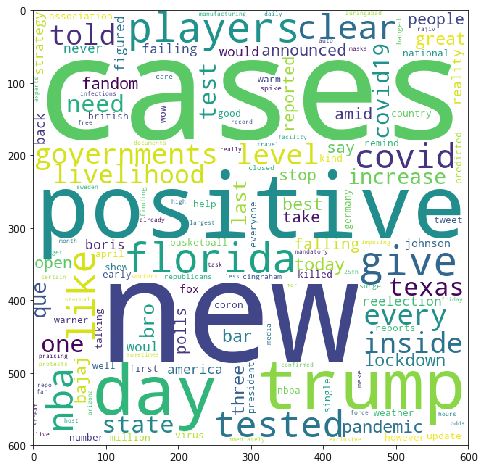

In [271]:
word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=stop_nltk,max_words=150,normalize_plurals=True,collocations=False).generate_from_text(" ".join(pos_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [273]:
pos_tweets[pos_tweets.str.contains('novel')]

292    cluster mysterious deaths some involving infan...
Name: tweet, dtype: object

### Defining a function to get tweets for a keyword and plot the sentiment pie chart and the word clouds

In [276]:
def live_sentiment(query_term):
    
    #Get the tweets for the term
    fetched_tweets = tweepy.Cursor(api.search, q=query_term).items(100)
    tweets_raw = []
    for twt in fetched_tweets:
         tweets_raw.append(twt.text)


    #Cleaning the tweets
    tweets_clean = list(map(clean_tweet, tweets_raw))
    stop_nltk = stopwords.words("english")
    mystop = list(stop_nltk) + ['rt', 'amp', query_term]
    df = pd.DataFrame({'tweet':tweets_clean})
    
    #Get sentiment
    df['sentiment'] = df.tweet.apply(get_sentiment)
    distr = df.sentiment.value_counts(normalize=True)

    #Plotting the sentiment distribution
    fig, ax = plt.subplots(); ax.axis("equal")
    ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
    plt.show()

    #Wordcloud for positive tweets
    pos_tweets = df.tweet[df.sentiment=='Positive']
    word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=mystop,max_words=150,normalize_plurals=True,collocations=True).generate_from_text(" ".join(pos_tweets))
    plt.figure(figsize=(6,6),facecolor=None)
    plt.imshow(word_cloud)

    #Wordcloud for negative tweets
    neg_tweets = df.tweet[df.sentiment=='Negative']
    word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=mystop,max_words=150,normalize_plurals=True,collocations=True).generate_from_text(" ".join(neg_tweets))
    plt.figure(figsize=(6,6),facecolor=None)
    plt.imshow(word_cloud)

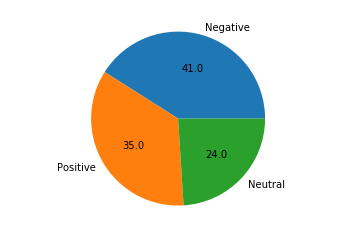

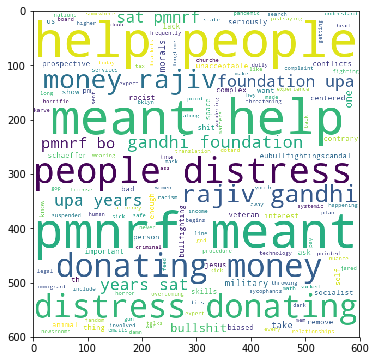

In [277]:
live_sentiment('ethics')

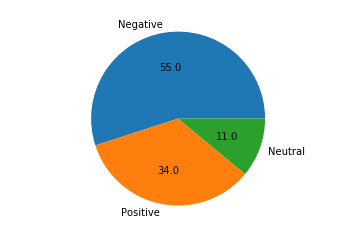

In [278]:
live_sentiment('emergency')